<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/All_models_for_short_term_power_forecasting_All_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import seaborn as sns
import io
import datetime
import time
scalar=MinMaxScaler()

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

# **Dataframe** 

In [ ]:
url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset
url13 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CCO%20dataset%20.csv' #CCO 10 min data
url14 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/germany-wind-energy.csv' #Germany wind data(daily)

# **Reading the dataset**

In [ ]:
df = pd.read_csv(url12)
df

,Date & Time,Active Power,Forecasted Power
0,8/1/2021 0:00,95.84,100.25
1,8/1/2021 0:10,96.03,100.01
2,8/1/2021 0:20,93.72,97.12
3,8/1/2021 0:30,88.84,96.96
4,8/1/2021 0:40,90.97,94.08
...,...,...,...
21971,12/31/2021 23:10,21.75,0.00
21972,12/31/2021 23:20,17.91,0.00
21973,12/31/2021 23:30,14.70,0.00
21974,12/31/2021 23:40,17.02,0.00


 **Dataframe column rename**

In [ ]:
col_0=(df.columns)[0]
col_1=(df.columns)[1]
col_2=(df.columns)[2]
feature_0 = 'Date & Time'
feature_1 = 'Active_Power'
feature_2 = 'Wind_speed'
df.rename(columns={col_0 : feature_0 , col_1 : feature_1 },inplace=True)
df

,Date & Time,Active_Power,Forecasted Power
0,8/1/2021 0:00,95.84,100.25
1,8/1/2021 0:10,96.03,100.01
2,8/1/2021 0:20,93.72,97.12
3,8/1/2021 0:30,88.84,96.96
4,8/1/2021 0:40,90.97,94.08
...,...,...,...
21971,12/31/2021 23:10,21.75,0.00
21972,12/31/2021 23:20,17.91,0.00
21973,12/31/2021 23:30,14.70,0.00
21974,12/31/2021 23:40,17.02,0.00


**Convert the date column to datetime object**

In [ ]:
df['Date & Time'] = pd.to_datetime(df['Date & Time']) 
df

,Date & Time,Active_Power,Forecasted Power
0,2021-08-01 00:00:00,95.84,100.25
1,2021-08-01 00:10:00,96.03,100.01
2,2021-08-01 00:20:00,93.72,97.12
3,2021-08-01 00:30:00,88.84,96.96
4,2021-08-01 00:40:00,90.97,94.08
...,...,...,...
21971,2021-12-31 23:10:00,21.75,0.00
21972,2021-12-31 23:20:00,17.91,0.00
21973,2021-12-31 23:30:00,14.70,0.00
21974,2021-12-31 23:40:00,17.02,0.00


**Active power convert to =>MW**

In [ ]:
# df[feature_1]=df[feature_1].div(1000)
# df

**set the index to the Date time column**

In [ ]:
df.set_index(feature_0,inplace=True) 

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,Active_Power,Forecasted Power
count,"21,976.00","21,974.00"
mean,47.85,50.33
std,37.67,41.76
min,-0.76,0.00
25%,13.22,2.59
50%,37.43,47.42
75%,91.31,92.96
max,103.50,103.50


In [ ]:
df.isnull().sum()

Active_Power        0
Forecasted Power    2
dtype: int64

**Visualization**

**correlation between the values**

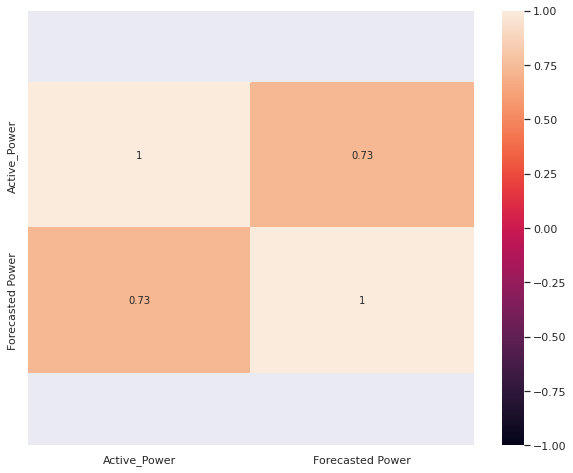

,Active_Power,Forecasted Power
Active_Power,1.00,0.73
Forecasted Power,0.73,1.00


In [ ]:
#correlation between the values
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

# **Train an validation data set**

In [ ]:
df=pd.DataFrame(df)
df_temp=df.copy()

In [ ]:
df_temp

,Active_Power,Forecasted Power
Date & Time,,
2021-08-01 00:00:00,95.84,100.25
2021-08-01 00:10:00,96.03,100.01
2021-08-01 00:20:00,93.72,97.12
2021-08-01 00:30:00,88.84,96.96
2021-08-01 00:40:00,90.97,94.08
...,...,...
2021-12-31 23:10:00,21.75,0.00
2021-12-31 23:20:00,17.91,0.00
2021-12-31 23:30:00,14.70,0.00


In [ ]:
df=df_temp[0:10000] #8/1/2021 0:00 to 9/30/2021 23:50

In [ ]:
df=df.replace(0,df.mean())
count = (df == 0).sum()
count

Active_Power        0
Forecasted Power    0
dtype: int64

**Divide train and validation sets**

In [ ]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

#print(train.shape)
#print(valid.shape)
#print(test.shape)

#print(train.describe())
#print(valid.describe())
#print(test.describe())

# **Data preparation train and validation**

In [ ]:
T = 6
HORIZON = 1

In [ ]:
scalar= MinMaxScaler()

In [ ]:
def data_prepare(dataF,feature):
    dataF=pd.DataFrame(dataF[feature])
    dataF[feature] = scalar.fit_transform(dataF)
    dataF_shifted = dataF.copy()
    dataF_shifted['y_t+1'] = dataF_shifted[feature].shift(-1)
    print(dataF_shifted.head(10))

    for t in range(1, T+1):
        dataF_shifted[feature+'_t-'+str(T-t)] = dataF_shifted[feature].shift(T-t)
    dataF_shifted = dataF_shifted.rename(columns={feature:'Current_'+feature})

    # Discard any samples with missing values
    dataF_shifted = dataF_shifted.dropna(how='any')
    #train_shifted.head(10)

    Y_dataF = np.array(dataF_shifted['y_t+1'])
    X_dataF = np.array(dataF_shifted[[feature+'_t-'+str(T-t) for t in range(1, T+1)]])

    # This is an important step to reshape the X into 3 dimension array
    X_dataF = X_dataF.reshape(X_dataF.shape[0], T, 1)

    return X_dataF,Y_dataF,dataF_shifted 

In [ ]:
X_train,Y_train,train_shifted = data_prepare(train,feature_1)

NameError: ignored

In [ ]:
print(Y_train.shape)
print(X_train.shape)

**Data preparation - Validation data**

In [ ]:
X_valid,Y_valid,valid_shifted = data_prepare(valid,feature_1)

In [ ]:
print(Y_valid.shape)
print(X_valid.shape)

# **Implement the Deep learning model**

In [ ]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import LSTM, GRU, Conv1D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# UNITS = 5 # number of units in the RNN layer
# BATCH_SIZE = 32 # number of samples per mini-batch
# EPOCHS = 25 # maximum number of times the training algorithm will cycle through all samples

In [ ]:
BATCH_SIZE = 32
EPOCHS = 30


#1: Dilated CNN
#2: GRU
#3: LSTM
#4. Dilated CNN+Stacked LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 def loss_plots_summary(model):
    model.compile(optimizer='RMSprop', loss='mse')
    print(model.summary())
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
    best_val = ModelCheckpoint('model_{epoch:02d}.h5', save_best_only=False, mode='min', period=1)

    history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_valid, Y_valid),callbacks=[earlystop, best_val],verbose=1)
    plot_loss = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
    plot_loss.plot(logy=True, figsize=(10,10), fontsize=12)
    plt.xlabel('epoch', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    print(plt.show())


In [ ]:
def NN_model(model_no):
    if model_no == 1:
        LATENT_DIM = 10
        KERNEL_SIZE = 2
        model = Sequential()
        model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
        model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
        model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
        #model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=8))
        model.add(Flatten())
        model.add(Dense(HORIZON, activation='linear'))

        loss_plots_summary(model)

        path = '/content/drive/MyDrive/Colab Notebooks/Weights/dilated_CNN_model.h5'
        model.save(path)



    elif model_no==2:
        UNITS = 5 # number of units in the RNN layer
        model = Sequential()
        model.add(GRU(UNITS, input_shape=(T, 1)))
        model.add(Dense(HORIZON))

        loss_plots_summary(model)

        path = '/content/drive/MyDrive/Colab Notebooks/Weights/GRU_model.h5'
        model.save(path)

    elif model_no==3:
      win_length=6
      num_feature=1
      model=tf.keras.Sequential()
      model.add(tf.keras.layers.LSTM(64,input_shape=(win_length,num_feature),return_sequences=True))
      model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
      model.add(tf.keras.layers.LSTM(32,return_sequences=True))
      model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
      model.add(tf.keras.layers.Dropout(0.1))
      # model.add(tf.keras.layers.LSTM(64,return_sequences=True))
      # model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
      # model.add(tf.keras.layers.Dropout(0.1))
      model.add(tf.keras.layers.LSTM(16,return_sequences=False))
      model.add(tf.keras.layers.Dropout(0.1))
      model.add(tf.keras.layers.Dense(1))

      loss_plots_summary(model)

      path = '/content/drive/MyDrive/Colab Notebooks/Weights/LSTM_model.h5'
      model.save(path)
    
    elif model_no==4:
      LATENT_DIM = 10
      KERNEL_SIZE = 2
      model=Sequential()
      model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
      model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
      model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
      model.add(LSTM(LATENT_DIM,return_sequences=True,input_shape=(T,1)))
      model.add(LSTM(LATENT_DIM,return_sequences=True))
      model.add(LSTM(LATENT_DIM))
      model.add(Flatten())
      model.add(Dense(HORIZON, activation='linear'))

      loss_plots_summary(model)

      path = '/content/drive/MyDrive/Colab Notebooks/Weights/CNN+LSTM_model.h5'
      model.save(path)

    else:
      print("No models inserted")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 10)             30        
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 10)             210       
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 10)             210       
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
250/250 [==============================] -

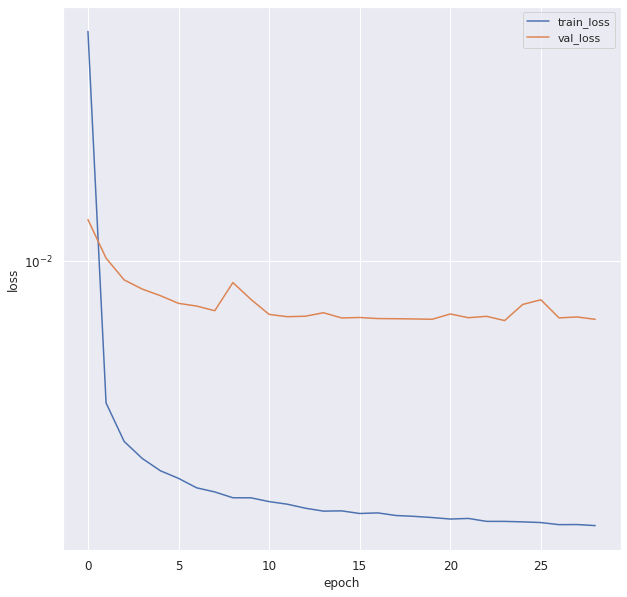

None


In [ ]:
for i in range(1,5):
  NN_model(i)

# **Load model and train valid metrics**

**Load model**

In [ ]:
model_no = 4

import tensorflow as tf
if model_no==1:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/dilated_CNN_model.h5')
elif model_no==2:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/GRU_model.h5')
elif model_no==3:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/LSTM_model.h5')
elif model_no==4:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/CNN+LSTM_model.h5')

In [ ]:
Y_train_pred=model(X_train)
print(Y_train_pred)
Y_train=pd.DataFrame(Y_train)
Y_train=Y_train.replace(0,Y_train.mean())
Y_train=np.array(Y_train)


def mape(actual, pred): 
    # actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

def rmse(actual, pred): 
    # actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

from sklearn.metrics import r2_score

actual = Y_train
pred = Y_train_pred

print('MAE for model train set  = '+ str(round(mape(actual, pred),2))+' MW')
print('RMSE for model train set = '+ str(round(rmse(actual, pred),2))+' MW')
print('R^2 for model train set  = '+ str(round(r2_score(actual, pred),2)))

NameError: ignored

In [ ]:
Y_valid_pred=model(X_valid)
print(Y_valid_pred)
Y_valid=pd.DataFrame(Y_valid)
Y_valid=Y_valid.replace(0,Y_valid.mean())
Y_valid=np.array(Y_valid)


def mape(actual, pred): 
    # actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

def rmse(actual, pred): 
    # actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

from sklearn.metrics import r2_score

actual = Y_valid
pred = Y_valid_pred

print('MAE for model validation set  = '+ str(round(mape(actual, pred),2))+' MW')
print('RMSE for model validation set = '+ str(round(rmse(actual, pred),2))+' MW')
print('R^2 for model validation set  = '+ str(round(r2_score(actual, pred),2)))

In [ ]:
# test_set_1 = df_temp[7000:7500]  #10/1/2021 00:00 to 10/10/2021 23:50
# test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
# test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

# dataset_index=1

# if dataset_index==1:
#   test = test_set_1
# elif dataset_index==2:
#   test = test_set_2
# elif dataset_index==3:
#   test = test_set_3

# **Kaggle dataset**

In [ ]:
test = pd.read_csv(url10)
test = test[6500:6700]
test

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
6500,19 02 2018 15:10,"3,427.84",11.68,"3,462.31",59.88
6501,19 02 2018 15:20,"3,482.68",12.12,"3,539.41",61.51
6502,19 02 2018 15:30,"3,597.89",12.82,"3,595.34",60.82
6503,19 02 2018 15:40,"3,577.99",12.49,"3,578.66",61.69
6504,19 02 2018 15:50,"3,338.12",11.83,"3,493.87",61.71
...,...,...,...,...,...
6695,20 02 2018 23:40,-0.04,2.18,0.00,96.78
6696,20 02 2018 23:50,0.00,2.30,0.00,85.01
6697,21 02 2018 00:00,0.00,2.63,0.00,88.02
6698,21 02 2018 00:10,84.10,4.19,158.84,92.28


In [ ]:
col_0=(test.columns)[0]
col_1=(test.columns)[1]
col_2=(test.columns)[2]
feature_0 = 'Date & Time'
feature_1 = 'Active_Power'
feature_2 = 'Wind_speed'
test.rename(columns={col_0 : feature_0 , col_1 : feature_1 },inplace=True)
print(test)
test['Date & Time'] = pd.to_datetime(test['Date & Time']) 
print(test)
test[feature_1]=test[feature_1].div(1000)
print(test)
test.set_index(feature_0,inplace=True) 
test

           Date & Time  Active_Power  Wind Speed (m/s)  \
6500  19 02 2018 15:10      3,427.84             11.68   
6501  19 02 2018 15:20      3,482.68             12.12   
6502  19 02 2018 15:30      3,597.89             12.82   
6503  19 02 2018 15:40      3,577.99             12.49   
6504  19 02 2018 15:50      3,338.12             11.83   
...                ...           ...               ...   
6695  20 02 2018 23:40         -0.04              2.18   
6696  20 02 2018 23:50          0.00              2.30   
6697  21 02 2018 00:00          0.00              2.63   
6698  21 02 2018 00:10         84.10              4.19   
6699  21 02 2018 00:20         14.96              2.88   

      Theoretical_Power_Curve (KWh)  Wind Direction (°)  
6500                       3,462.31               59.88  
6501                       3,539.41               61.51  
6502                       3,595.34               60.82  
6503                       3,578.66               61.69  
6504         

,Active_Power,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date & Time,,,,
2018-02-19 15:10:00,3.43,11.68,"3,462.31",59.88
2018-02-19 15:20:00,3.48,12.12,"3,539.41",61.51
2018-02-19 15:30:00,3.60,12.82,"3,595.34",60.82
2018-02-19 15:40:00,3.58,12.49,"3,578.66",61.69
2018-02-19 15:50:00,3.34,11.83,"3,493.87",61.71
...,...,...,...,...
2018-02-20 23:40:00,-0.00,2.18,0.00,96.78
2018-02-20 23:50:00,0.00,2.30,0.00,85.01
2018-02-21 00:00:00,0.00,2.63,0.00,88.02


# **CCO dataset**

In [ ]:
test = pd.read_csv(url13)
test

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2019-01-01 00:00:00+00:00,460.17,19.50,39.72,NaN,NaN,NaN,0.00,65.53,55.78,...,58.33,29.28,28.70,NaN,-0.56,10.23,2.00,G01,NaN,6.06
1,2019-01-01 00:10:00+00:00,429.09,19.46,39.59,NaN,NaN,NaN,0.00,65.53,55.93,...,57.92,29.00,28.69,NaN,-0.19,9.99,2.00,G01,NaN,6.11
2,2019-01-01 00:20:00+00:00,427.75,19.41,39.41,NaN,NaN,NaN,0.00,65.36,55.85,...,57.35,29.00,28.66,NaN,-0.49,9.97,2.00,G01,NaN,6.14
3,2019-01-01 00:30:00+00:00,438.65,19.39,39.30,NaN,NaN,NaN,0.00,65.41,55.95,...,57.00,29.00,28.59,NaN,-0.35,9.96,2.00,G01,NaN,5.92
4,2019-01-01 00:40:00+00:00,461.04,19.41,39.19,NaN,NaN,NaN,0.00,65.62,55.92,...,56.83,29.00,28.51,203.00,-0.15,10.21,2.00,G01,203.00,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15120,2019-04-16 00:00:00+00:00,-3.21,30.59,44.73,NaN,NaN,NaN,0.00,52.00,51.43,...,57.07,41.10,44.79,315.50,-8.99,4.06,2.00,G01,315.50,3.22
15121,2019-04-16 00:10:00+00:00,-6.59,30.54,39.75,NaN,NaN,NaN,0.00,46.89,51.24,...,55.77,36.67,38.70,314.00,-9.62,1.74,2.00,G01,314.00,2.63
15122,2019-04-16 00:20:00+00:00,-5.47,30.35,44.41,NaN,NaN,NaN,0.00,52.11,50.97,...,55.21,41.00,43.87,320.00,-9.50,0.97,2.00,G01,320.00,2.67
15123,2019-04-16 00:30:00+00:00,-5.13,30.35,44.21,NaN,NaN,NaN,0.00,51.93,50.74,...,54.77,41.00,43.98,305.00,-9.71,0.64,1.00,G01,305.00,2.85


In [ ]:
col_0=(test.columns)[0]
col_1=(test.columns)[1]
col_2=(test.columns)[19]
feature_0 = 'Date & Time'
feature_1 = 'Active_Power'
feature_2 = 'Wind_speed'
test.rename(columns={col_0 : feature_0 , col_1 : feature_1 },inplace=True)
# print(test)
test['Date & Time'] = pd.to_datetime(test['Date & Time']) 
# print(test)
test[feature_1]=test[feature_1].div(1000)
# print(test)
test.set_index(feature_0,inplace=True) 
test

,Active_Power,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
Date & Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,0.46,19.50,39.72,NaN,NaN,NaN,0.00,65.53,55.78,"1,140.44",...,58.33,29.28,28.70,NaN,-0.56,10.23,2.00,G01,NaN,6.06
2019-01-01 00:10:00+00:00,0.43,19.46,39.59,NaN,NaN,NaN,0.00,65.53,55.93,"1,113.33",...,57.92,29.00,28.69,NaN,-0.19,9.99,2.00,G01,NaN,6.11
2019-01-01 00:20:00+00:00,0.43,19.41,39.41,NaN,NaN,NaN,0.00,65.36,55.85,"1,112.59",...,57.35,29.00,28.66,NaN,-0.49,9.97,2.00,G01,NaN,6.14
2019-01-01 00:30:00+00:00,0.44,19.39,39.30,NaN,NaN,NaN,0.00,65.41,55.95,"1,111.13",...,57.00,29.00,28.59,NaN,-0.35,9.96,2.00,G01,NaN,5.92
2019-01-01 00:40:00+00:00,0.46,19.41,39.19,NaN,NaN,NaN,0.00,65.62,55.92,"1,138.94",...,56.83,29.00,28.51,203.00,-0.15,10.21,2.00,G01,203.00,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16 00:00:00+00:00,-0.00,30.59,44.73,NaN,NaN,NaN,0.00,52.00,51.43,452.14,...,57.07,41.10,44.79,315.50,-8.99,4.06,2.00,G01,315.50,3.22
2019-04-16 00:10:00+00:00,-0.01,30.54,39.75,NaN,NaN,NaN,0.00,46.89,51.24,199.06,...,55.77,36.67,38.70,314.00,-9.62,1.74,2.00,G01,314.00,2.63
2019-04-16 00:20:00+00:00,-0.01,30.35,44.41,NaN,NaN,NaN,0.00,52.11,50.97,110.02,...,55.21,41.00,43.87,320.00,-9.50,0.97,2.00,G01,320.00,2.67


In [ ]:
test.describe()

,Active_Power,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,"13,993.00","13,957.00","13,973.00",0.00,0.00,0.00,"13,881.00","13,973.00","13,955.00","13,929.00","13,956.00","13,955.00","13,928.00","13,960.00","8,874.00","13,994.00","13,886.00","13,957.00","8,874.00","14,004.00"
mean,0.44,29.57,41.94,NaN,NaN,NaN,0.00,62.21,56.58,987.41,64.87,64.25,36.71,39.07,188.43,82.69,8.89,69.57,188.43,5.16
std,0.46,5.23,5.09,NaN,NaN,NaN,0.00,9.03,4.30,482.41,15.30,15.30,5.55,6.58,62.82,96.49,4.30,739.90,62.82,1.90
min,-0.04,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-28.81,0.00,0.00,0.00,1.16
25%,0.04,25.57,39.42,NaN,NaN,NaN,0.00,56.52,53.71,854.39,53.65,53.04,33.41,34.58,164.00,-0.01,7.86,2.00,164.00,3.55
50%,0.29,29.26,42.11,NaN,NaN,NaN,0.00,62.87,56.42,"1,045.06",61.41,60.66,37.00,39.06,185.00,52.97,9.38,2.00,185.00,5.06
75%,0.68,33.64,44.95,NaN,NaN,NaN,0.00,68.07,59.15,"1,296.41",71.91,71.23,40.40,43.76,212.00,134.20,11.64,2.00,212.00,6.57
max,1.74,41.79,54.23,NaN,NaN,NaN,0.00,80.69,69.24,"1,781.18",122.09,121.44,48.00,53.98,357.00,354.80,16.00,"16,384.00",357.00,13.20


In [ ]:
df_1=test.copy()
df_1[feature_1][df_1[feature_1]<0]=0
df_1
test=df_1[800:1000]

# **Germany dataset**

In [ ]:
test = pd.read_csv(url14)
test=test.dropna()
test

,Date & Time,wind_generation_actual,wind_capacity,temperature
0,1/1/2017,"291,760.00","37,149.13",-2.12
1,1/2/2017,"295,097.00","37,152.12",-1.15
2,1/3/2017,"666,170.00","37,155.21",-0.24
3,1/4/2017,"686,581.00","37,160.12",0.62
4,1/5/2017,"261,759.00","37,163.54",-3.91
...,...,...,...,...
1089,12/26/2019,"132,739.00","50,424.12",2.79
1090,12/27/2019,"146,590.00","50,427.00",1.33
1091,12/28/2019,"159,126.00","50,427.29",-1.44
1092,12/29/2019,"349,839.00","50,434.75",-1.31


In [ ]:
col_0=(test.columns)[0]
col_1=(test.columns)[1]
# col_2=(test.columns)[19]
feature_0 = 'Date & Time'
feature_1 = 'Active_Power'
# feature_2 = 'Wind_speed'
test.rename(columns={col_0 : feature_0 , col_1 : feature_1 },inplace=True)
# print(test)
test['Date & Time'] = pd.to_datetime(test['Date & Time']) 
# print(test)
test[feature_1]=test[feature_1].div(1000)
# print(test)
test.set_index(feature_0,inplace=True) 
test

,Active_Power,wind_capacity,temperature
Date & Time,,,
2017-01-01,291.76,"37,149.13",-2.12
2017-01-02,295.10,"37,152.12",-1.15
2017-01-03,666.17,"37,155.21",-0.24
2017-01-04,686.58,"37,160.12",0.62
2017-01-05,261.76,"37,163.54",-3.91
...,...,...,...
2019-12-26,132.74,"50,424.12",2.79
2019-12-27,146.59,"50,427.00",1.33
2019-12-28,159.13,"50,427.29",-1.44


In [ ]:
test.describe()

,Active_Power,wind_capacity,temperature
count,"1,094.00","1,094.00","1,094.00"
mean,305.82,"45,066.02",10.05
std,205.73,"4,315.84",7.74
min,16.48,"37,149.13",-9.36
25%,148.55,"41,447.94",3.58
50%,254.33,"46,073.00",10.05
75%,412.57,"49,203.00",16.57
max,998.90,"50,452.00",28.24


In [ ]:
df_1=test.copy()
df_1[feature_1][df_1[feature_1]<0]=0
df_1
test=df_1[800:1000]

# **Test set preparation**

In [ ]:
count = (test[feature_1] == 0).sum()
count

0

In [ ]:
test[feature_1]=test[feature_1].replace(0,test[feature_1].mean())
# test[feature_1]=test[feature_1].replace(0,test[feature_1].median())
# df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [ ]:
X_test,Y_test,test_shifted = data_prepare(test,feature_1)

             Active_Power  y_t+1
Date & Time                     
2019-03-12           0.73   1.00
2019-03-13           1.00   0.93
2019-03-14           0.93   0.96
2019-03-15           0.96   0.81
2019-03-16           0.81   0.80
2019-03-17           0.80   0.73
2019-03-18           0.73   0.18
2019-03-19           0.18   0.23
2019-03-20           0.23   0.20
2019-03-21           0.20   0.09


In [ ]:
print(Y_test.shape)
print(X_test.shape)

(194,)
(194, 6, 1)


# **Predictions**

In [ ]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['Date & Time'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='Date & Time', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(Y_test).ravel()
eval_df['prediction'] =predictions 
print(eval_df)



       0
0   0.77
1   0.64
2   0.15
3   0.41
4   0.18
..   ...
189 0.20
190 0.14
191 0.12
192 0.14
193 0.27

[194 rows x 1 columns]
    Date & Time    h  prediction  actual
0    2019-03-17  t+1        0.77    0.73
1    2019-03-18  t+1        0.64    0.18
2    2019-03-19  t+1        0.15    0.23
3    2019-03-20  t+1        0.41    0.20
4    2019-03-21  t+1        0.18    0.09
..          ...  ...         ...     ...
189  2019-09-22  t+1        0.20    0.14
190  2019-09-23  t+1        0.14    0.12
191  2019-09-24  t+1        0.12    0.14
192  2019-09-25  t+1        0.14    0.27
193  2019-09-26  t+1        0.27    0.38

[194 rows x 4 columns]


In [ ]:
eval_df

,Date & Time,h,prediction,actual
0,2019-03-17,t+1,0.77,0.73
1,2019-03-18,t+1,0.64,0.18
2,2019-03-19,t+1,0.15,0.23
3,2019-03-20,t+1,0.41,0.20
4,2019-03-21,t+1,0.18,0.09
...,...,...,...,...
189,2019-09-22,t+1,0.20,0.14
190,2019-09-23,t+1,0.14,0.12
191,2019-09-24,t+1,0.12,0.14
192,2019-09-25,t+1,0.14,0.27


In [ ]:
eval_df[['prediction']]=scalar.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scalar.inverse_transform(np.array(eval_df[['actual']]))
eval_df

,Date & Time,h,prediction,actual
0,2019-03-17,t+1,745.59,704.19
1,2019-03-18,t+1,627.91,197.48
2,2019-03-19,t+1,174.06,247.78
3,2019-03-20,t+1,415.23,217.27
4,2019-03-21,t+1,201.63,120.37
...,...,...,...,...
189,2019-09-22,t+1,215.64,167.55
190,2019-09-23,t+1,163.85,142.93
191,2019-09-24,t+1,147.37,161.04
192,2019-09-25,t+1,161.13,281.38


# **Evaluate the model**

**Performance metrics of our model**

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

from sklearn.metrics import r2_score

actual = eval_df['actual']
pred = eval_df['prediction']

print('MAE for model '+str(model_no)+'  = '+ str(round(mape(actual, pred),2))+' MW')
print('RMSE for model '+str(model_no)+' = '+ str(round(rmse(actual, pred),2))+' MW')
print('R^2 for model '+str(model_no)+'  = '+ str(round(r2_score(actual, pred),2)))

MAE for model 4  = 0.5 MW
RMSE for model 4 = 136.8 MW
R^2 for model 4  = -0.12


In [ ]:
fig1 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="Model"+str(model_no)+": Expected vs predicted power forecasting") 
fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig1.show()

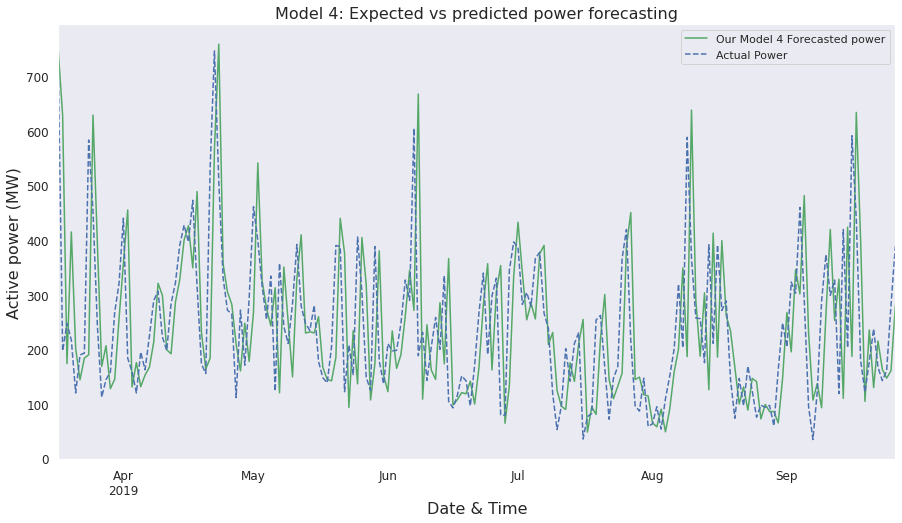

In [ ]:
eval_df.plot(x='Date & Time', y=['prediction','actual'], style=['g','--b'],fontsize=12, figsize=(15, 8))
plt.title("Model "+str(model_no)+": Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid() 
plt.legend(["Our Model "+str(model_no)+" Forecasted power", 'Actual Power'])
# plt.savefig("GRU-results.pdf")
plt.savefig("results.png")
plt.show()

# **All model plots together**

In [ ]:
model_1=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/dilated_CNN_model.h5')
model_2=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/GRU_model.h5')
model_3=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/LSTM_model.h5')
model_4=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/CNN+LSTM_model.h5')

In [ ]:
predictions_1 = scalar.inverse_transform(np.array(model_1(X_test)))
predictions_2 = scalar.inverse_transform(np.array(model_2(X_test)))
predictions_3 = scalar.inverse_transform(np.array(model_3(X_test)))
predictions_4 = scalar.inverse_transform(np.array(model_4(X_test)))

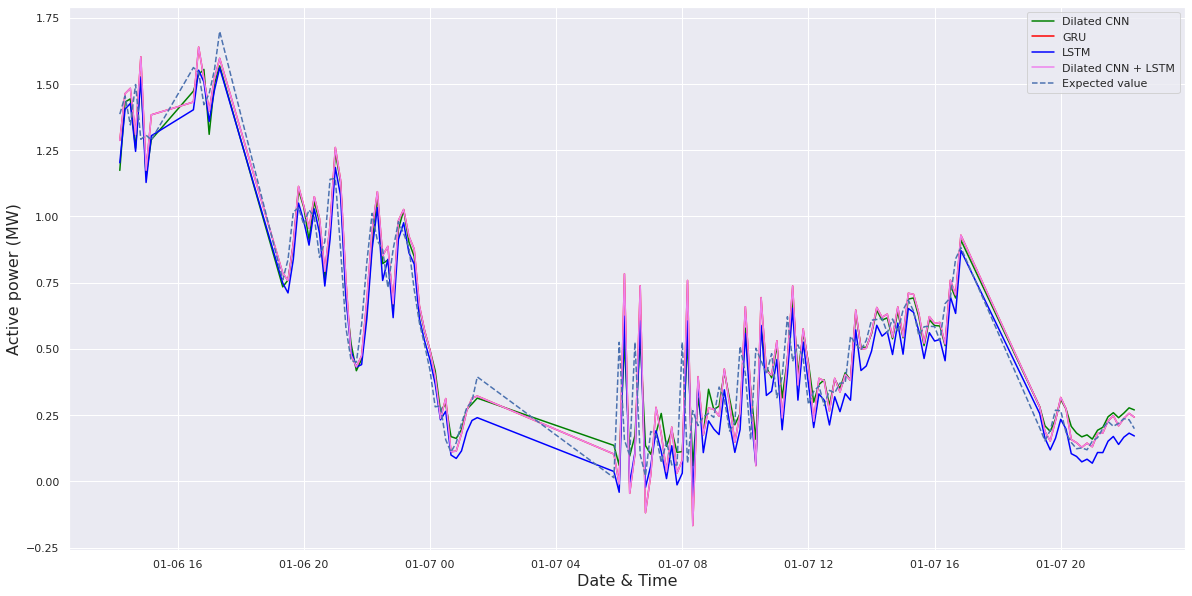

In [ ]:
import matplotlib.pyplot as plt
x=np.array(eval_df['Date & Time'])
y=np.array(eval_df['actual'])
plt.figure(figsize=(20,10))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)

plt.rc('axes', labelsize=15)
plt.plot(x,predictions_1, color = 'green', label = 'Dilated CNN')
plt.plot(x,predictions_2, color = 'red', label = 'GRU')
plt.plot(x,predictions_3, color = 'blue', label = 'LSTM')
plt.plot(x,predictions_2, color = 'violet', label = 'Dilated CNN + LSTM')
plt.plot(x,y, '--b', label = 'Expected value')
# plt.plot(x,predictions_1,x,predictions_2,x,predictions_3,x,predictions_4)
# ax.plot(line_2, color = 'red', label = 'Line 2')
plt.legend()
plt.savefig("benchmark.png")
plt.show()


In [ ]:
`eval_df.plot(x='Date & Time', y=predictions_1,predictions_2,predictions_3,predictions_4 ,fontsize=12, figsize=(15, 8))
plt.title("Dilated CNN vs GRU vsLSTM vs Dilated CNN + Stacked LSTM",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Dilated CNN','GRU','LSTM','Dilated CNN+Stacked LSTM'])
#plt.savefig("benchmark.pdf")
plt.savefig("benchmark.png")
plt.show()

SyntaxError: ignored

In [ ]:
style=['g'.,'--b']
